In [44]:
# Load packages
import os
import pandas as pd
import numpy as np
 # Required for basic python plotting functionality
import matplotlib.pyplot as plt
# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="darkgrid")  # can set style depending on how you'd like it to look

In [45]:
productInfoDF = os.path.join(os.getcwd(), "./products_info.csv")
productInfoDF = pd.read_csv(productInfoDF)

In [46]:
productInfoDF["Primary Essential Function"].unique()

array(['LC - Digital Learning Platforms',
       'LC - Sites, Resources & Reference - Games & Simulations',
       'LC - Courseware & Textbooks', 'LC - Study Tools - Q&A',
       'LC - Sites, Resources & Reference - Streaming Services',
       'LC - Study Tools',
       'CM - Teacher Resources - Professional Learning',
       'SDO - Learning Management Systems (LMS)',
       'LC - Content Creation & Curation',
       'LC - Sites, Resources & Reference',
       'LC - Online Course Providers & Technical Skills Development',
       'CM - Classroom Engagement & Instruction - Communication & Messaging',
       'SDO - School Management Software - SSO',
       'LC - Sites, Resources & Reference - Thesaurus & Dictionary',
       'LC/CM/SDO - Other', 'SDO - Data, Analytics & Reporting',
       'LC - Sites, Resources & Reference - Encyclopedia',
       'CM - Classroom Engagement & Instruction - Classroom Management',
       'LC - Sites, Resources & Reference - Digital Collection & Repository',
 

In [47]:
engagmentListOfFiles = os.listdir("./engagement_data")
engagmentDict = {}
for csv in engagmentListOfFiles:
    engagmentDict[csv[:-4]] = pd.read_csv("./engagement_data/"+csv)

In [48]:
# Get data
districtDF = os.path.join(os.getcwd(), "./districts_info.csv")
districtDF = pd.read_csv(districtDF)

statesOfInterest = districtDF.state.unique()
print(statesOfInterest)
statesOfInterest = list (statesOfInterest)


['Illinois' nan 'Utah' 'Wisconsin' 'North Carolina' 'Missouri'
 'Washington' 'Connecticut' 'Massachusetts' 'New York' 'Indiana'
 'Virginia' 'Ohio' 'New Jersey' 'California' 'District Of Columbia'
 'Minnesota' 'Arizona' 'Texas' 'Tennessee' 'Florida' 'North Dakota'
 'New Hampshire' 'Michigan']


In [49]:
districtDF[districtDF['state'].isna()].isna().sum()

district_id                  0
state                       57
locale                      57
pct_black/hispanic          57
pct_free/reduced            57
county_connections_ratio    57
pp_total_raw                57
dtype: int64

From this we can tell that when the state value is equal to nan all other Nan collumn values are also nan except district_id . We should take a closer look at the engagment data for those districts

In [50]:
listofNanStates = list(districtDF[districtDF['state'].isna()].district_id)
for i in listofNanStates: 
    if i in engagmentDict:
        print(i)
# For the sake of memory i am going to delete the dictionary until i need it
del engagmentDict

This tells us that the district engagement data is not available for all of the rows where state="Nan". We will ommit this data as it has no value to us now and it will be impossible to find which district ID matches the state,locale etc... 

In [51]:
districtDF = districtDF[districtDF['state'].notna()]
statesOfInterest.remove(np.nan)
statesOfInterest= [str.upper(x) for x in statesOfInterest]

<h1> Exploring the Policy DataFrame</h1>

In [52]:
policyDataFrame = os.path.join(os.getcwd(), "./COVID-19 US state policy 3_29_2021.csv")
policyDataFrame = pd.read_csv(policyDataFrame)
policyDataFrame.shape


(57, 222)

In [53]:
def preProcessingData():
    policyDataFrame = os.path.join(os.getcwd(), "./COVID-19 US state policy 3_29_2021.csv")
    policyDataFrame = pd.read_csv(policyDataFrame)
    originalStateColumn = policyDataFrame["STATE"]
    policyDataFrame = policyDataFrame.T
    dfs = [x for _, x in policyDataFrame.groupby(1)] # this allowed me to make 26 different series so i can take a look at each category carefully 
    listofDfs = []
    for miniDf in dfs: # This put the category description back 
        tempdf = miniDf.T
        tempdf["STATE"] = originalStateColumn
        listofDfs.append(tempdf)
    return listofDfs
    # for k in range (0, len(listofDfs)): # This allowed me to parse through each category dataframe to inspect it without having to save it onto my hard-drive giving me O(1) Space :) 
    #     temp = pd.DataFrame(listofDfs[k].iloc[0])
    #     print(listofDfs[k].T.reset_index()) 
def getMeDataFrame(k :int  , listofDfs : pd.DataFrame):
    temp = pd.DataFrame(listofDfs[k].iloc[0])
    return listofDfs[k].T.reset_index()
    # print(listofDfs[k].T.reset_index()) 


In [54]:
# Notes 
listofDfs = preProcessingData()
arbitraryNum = 22
getMeDataFrame(arbitraryNum,listofDfs) # This allowed me to parse through each category dataframe to inspect it without having to save it onto my hard-drive giving me O(1) Space :) 


,index,0,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
0,CLBAR3,Close Bars (x3),third_closures,start,date,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,CLRST3,Close Indoor Dining (x3),third_closures,start,date,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,END_CLRST3,Reopen Indoor Dining (x3),third_closures,end,date,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,STATE,State,category,type,unit,Alabama,Alaska,Arizona,Arkansas,California,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,NaN,NaN


This Preprossing of data allowed us to get these following categories of interest
- Reopening,food_security, masks,physical_distance_closure,physical_distance_closures,pre_covid_policy
- population_density,quarantines,reopening,second_closures,shelter,state_characteristics, State of emergency issued	

Along with These topics within each category : 
- Category [minimum_wage] = MINWAGEJAN2020	MINWAGEJUL2020	MINWAGESEP2020	MINWAGEOCT2020	TIPMINWAGE2020 (currently not focusing on this)
- Category [unemployment] = UIMAXDUR (currently not focusing on this)

<h1>End of pre-processing</h1>

In [55]:
policyDataFrame = os.path.join(os.getcwd(), "./COVID-19 US state policy 3_29_2021.csv")
policyDataFrame = pd.read_csv(policyDataFrame)
categoriesOfInterest = ["category","Reopening","food_security", "masks","physical_distance_closure","physical_distance_closures","pre_covid_policy"
"population_density","quarantines","reopening","second_closures","shelter,state_characteristics", "State of emergency issued"]

In [56]:
policyDataFrame= policyDataFrame.T[policyDataFrame.T[1].isin( categoriesOfInterest)].T
policyDataFrame= policyDataFrame.drop([55, 56])#.T # Drop the last two empty rows
policyDataFrame["STATE"] = policyDataFrame["STATE"].str.upper()

In [57]:
policyDataFrame.head()

,STATE,CLSCHOOL,CLDAYCR,OPNCLDCR,CLNURSHM,CLBSNS,CURFEW,END_BSNS,FM_ALL,FM_ALL2,...,SNAPALLO,SNAPEBT20,SNAPEBT21,SNAPSUSP,SNAPTLW,CASCLOSE,CASOPEN,CASCLOSE2,CASOPEN2,CASTRIBCAS
0,STATE,Date closed K-12 public schools,Closed day cares,Reopen day cares,Date banned visitors to nursing homes,Closed other non-essential businesses,Closed businesses overnight,Began to reopen businesses,Mandate face mask use by all individuals in pu...,Second mandate for facemasks by all individual...,...,SNAP Waiver - Emergency Allotments to Current ...,SNAP Waiver - Pandemic EBT during school year ...,SNAP Waiver - Pandemic EBT during school year ...,SNAP Waiver - Temporary Suspension of Claims C...,2020 Q1 SNAP ABAWD Time Limit Waiver,State-Mandated Casino Closure,State-Mandated Casino Re-Opening,Second Casino Closure,Second Casino Re-Opening,Mention of Tribal Casinos
1,CATEGORY,physical_distance_closure,physical_distance_closure,Reopening,physical_distance_closure,physical_distance_closure,physical_distance_closure,reopening,masks,masks,...,food_security,food_security,food_security,food_security,food_security,physical_distance_closures,reopening,second_closures,second_closures,physical_distance_closures
2,TYPE,start,start,end,start,start,start,end,start,start,...,start,start,start,start,attribute,start,end,start,end,attribute
3,UNIT,date,date,date,date,date,end,date,date,date,...,date,date,date,date,flag,date,date,date,date,flag
4,ALABAMA,20/3/2020,20/3/2020,23/5/2020,19/3/2020,28/3/2020,0,30/4/2020,16/7/2020,0,...,24/3/2020,4/21/2020,0,0,0,28/3/2020,22/5/2020,0,0,0


In [58]:
policyDataFrame['STATE'].unique()

array(['STATE', 'CATEGORY', 'TYPE', 'UNIT', 'ALABAMA', 'ALASKA',
       'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT',
       'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII',
       'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA',
       'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [59]:
mask = policyDataFrame['STATE'].isin(statesOfInterest)
mask[0:4] = True # keep the first 4 headers 
policyDataFrame = policyDataFrame[mask].reset_index(drop=True)
policyDataFrame.head(10)

,STATE,CLSCHOOL,CLDAYCR,OPNCLDCR,CLNURSHM,CLBSNS,CURFEW,END_BSNS,FM_ALL,FM_ALL2,...,SNAPALLO,SNAPEBT20,SNAPEBT21,SNAPSUSP,SNAPTLW,CASCLOSE,CASOPEN,CASCLOSE2,CASOPEN2,CASTRIBCAS
0,STATE,Date closed K-12 public schools,Closed day cares,Reopen day cares,Date banned visitors to nursing homes,Closed other non-essential businesses,Closed businesses overnight,Began to reopen businesses,Mandate face mask use by all individuals in pu...,Second mandate for facemasks by all individual...,...,SNAP Waiver - Emergency Allotments to Current ...,SNAP Waiver - Pandemic EBT during school year ...,SNAP Waiver - Pandemic EBT during school year ...,SNAP Waiver - Temporary Suspension of Claims C...,2020 Q1 SNAP ABAWD Time Limit Waiver,State-Mandated Casino Closure,State-Mandated Casino Re-Opening,Second Casino Closure,Second Casino Re-Opening,Mention of Tribal Casinos
1,CATEGORY,physical_distance_closure,physical_distance_closure,Reopening,physical_distance_closure,physical_distance_closure,physical_distance_closure,reopening,masks,masks,...,food_security,food_security,food_security,food_security,food_security,physical_distance_closures,reopening,second_closures,second_closures,physical_distance_closures
2,TYPE,start,start,end,start,start,start,end,start,start,...,start,start,start,start,attribute,start,end,start,end,attribute
3,UNIT,date,date,date,date,date,end,date,date,date,...,date,date,date,date,flag,date,date,date,date,flag
4,ARIZONA,16/3/2020,0,0,0,31/3/2020,0,8/5/2020,0,0,...,1/4/2020,4/17/2020,2/25/2021,0,1,0,0,0,0,0
5,CALIFORNIA,23/3/2020,0,0,0,19/3/2020,11/21/2020,8/5/2020,18/6/2020,0,...,30/3/2020,4/23/2020,0,0,1,0,0,0,0,0
6,CONNECTICUT,17/3/2020,0,0,9/3/2020,23/3/2020,11/2/2020,20/5/2020,20/4/2020,0,...,28/3/2020,4/24/2020,0,2/4/2020,1,0,0,0,0,1
7,DISTRICT OF COLUMBIA,16/3/2020,0,0,0,25/3/2020,11/23/2020,29/5/2020,17/4/2020,0,...,1/4/2020,5/19/2020,3/22/2021,0,1,0,0,0,0,0
8,FLORIDA,17/3/2020,0,0,15/3/2020,3/4/2020,0,18/5/2020,0,0,...,30/3/2020,5/27/2020,3/1/2021,0,0,0,0,0,0,0
9,ILLINOIS,17/3/2020,23/3/2020,29/5/2020,0,21/3/2020,0,29/5/2020,1/5/2020,0,...,1/4/2020,4/17/2020,1/15/2021,0,1,16/3/2020,1/7/2020,20/11/2020,0,0


In [60]:
# Adding district_id column to csv files in engagement data folder

# Path to the engagement_data folder
folder_path = 'engagement_data'
df_list = []
# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path)
        
        # Extract the district ID from the filename
        district_id = filename.split('.')[0]

        # Add a new column to the dataframe with the district ID
        df['district_id'] = int(district_id)
        
        df_list.append(df)
engagement_data = pd.concat(df_list, ignore_index=True)
# Get rid of unnessary variables
del df_list
del df 



Upon further inspection of the 'Primary Essential Function' column, all nan values seem to be a part of a larger website url. Such as http://student.classdojo.com/#/login where class dojo is the primary website and login is just the login page. So we will be dropping those rows

In [61]:
productInfoDF.dropna(inplace=True)

In [62]:
mask = productInfoDF['Primary Essential Function'].str.startswith("LC")
productOfInterest = productInfoDF.loc[mask]
productOfInterest.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [63]:
engagement_data= engagement_data.dropna(subset=['lp_id'])

engagement_data['lp_id'] = engagement_data['lp_id'].astype(np.int64)

In [64]:
district_idDict= dict(zip(districtDF["district_id"],districtDF["state"]))
engagement_data['State'] = engagement_data['district_id'].map(district_idDict)

# We are dropping states rows that are Nan as they 
# are not a state of interest as previously described
engagement_data= engagement_data.dropna(subset=['State']).reset_index()
engagement_data['State'] = engagement_data['State'].apply(str.lower)



In [65]:
engagement_data['State'] = engagement_data['State'].apply(str.lower)


In [66]:
engagement_data.head()

,index,time,lp_id,pct_access,engagement_index,district_id,State
0,67430,2020-01-01,32213,0.41,18.49,7305,massachusetts
1,67431,2020-01-01,51340,0.07,6.85,7305,massachusetts
2,67432,2020-01-01,49062,0.07,6.16,7305,massachusetts
3,67433,2020-01-01,99916,0.41,10.27,7305,massachusetts
4,67434,2020-01-01,95731,0.68,47.26,7305,massachusetts


We will be focusing on when schools closed in 2020 (Label: CLSCHOOL) , when non-essential businesses closed/opened (Label: CLBSNS/END_BSNS), and when face mask manditaes where first instated(Label: FM_ALL). 

In [67]:
policiesOfInterestDF = (policyDataFrame[["STATE","CLSCHOOL","CLBSNS","END_BSNS","FM_ALL"]][4:]).copy()


In [68]:
policiesOfInterestDF['STATE'] = policiesOfInterestDF['STATE'].apply(str.lower)
for label in ["CLSCHOOL","CLBSNS","END_BSNS","FM_ALL"]:
    policiesOfInterestDF[label] = policiesOfInterestDF[label].apply(
        lambda x: (datetime.datetime.strptime(str(x), "%d/%m/%Y").date())
                if x != "0" else np.nan)


In [69]:
policiesOfInterestDF.head()

,STATE,CLSCHOOL,CLBSNS,END_BSNS,FM_ALL
4,arizona,2020-03-16,2020-03-31,2020-05-08,NaN
5,california,2020-03-23,2020-03-19,2020-05-08,2020-06-18
6,connecticut,2020-03-17,2020-03-23,2020-05-20,2020-04-20
7,district of columbia,2020-03-16,2020-03-25,2020-05-29,2020-04-17
8,florida,2020-03-17,2020-04-03,2020-05-18,NaN


In [70]:
policiesOfInterestDF.head()

,STATE,CLSCHOOL,CLBSNS,END_BSNS,FM_ALL
4,arizona,2020-03-16,2020-03-31,2020-05-08,NaN
5,california,2020-03-23,2020-03-19,2020-05-08,2020-06-18
6,connecticut,2020-03-17,2020-03-23,2020-05-20,2020-04-20
7,district of columbia,2020-03-16,2020-03-25,2020-05-29,2020-04-17
8,florida,2020-03-17,2020-04-03,2020-05-18,NaN


In [71]:
temp = pd.merge(engagement_data, policiesOfInterestDF, left_on='State', right_on='STATE')
finaldf = pd.merge(temp, productOfInterest, left_on='lp_id', right_on='LP ID')
del temp
del engagement_data

In [72]:
finaldf= finaldf.drop(["index","STATE","LP ID"], axis=1)
finaldf.rename(columns = {'time':'EngagementDateRecorded'}, inplace = True)

In [73]:
# Convert to date-time
finaldf["EngagementDateRecorded"] = finaldf["EngagementDateRecorded"].apply(
        lambda x: (datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
)
 # certain rows have percentages over 1, i belive this is because certain ' lp_id''s reported percentages as a full number
#  for example 99% instead of 0.99 so we will convert it into a common base
finaldf["pct_access"] = finaldf["pct_access"].apply( lambda x: x/100 if x >1 else x) 
finaldf.head()

In [ ]:
x = finaldf.copy()#sample(frac=0.3, random_state=1)
del finaldf

Reminder: 
- CLSCHOOL corresponds to :  Date closed K-12 public schools	
- CLBSNS corresponds to :  Closed other non-essential business
- END_BSNS corresponds to :  Began to reopen business
- FM_ALL corresponds to : Mandate face mask use by all individuals in public spaces

In [ ]:
# using this we can see what dates certain policies happened 
display(x["CLSCHOOL"].value_counts())
display(x["CLBSNS"].value_counts())
display(x["END_BSNS"].value_counts())
display(x["FM_ALL"].value_counts())

2020-03-17    3945033
2020-03-16    1719640
2020-03-23     918300
2020-03-18     353606
2020-03-20     349771
2020-03-21      60860
Name: CLSCHOOL, dtype: int64

2020-03-24    1505085
2020-03-23    1217449
2020-03-27    1041777
2020-03-21    1031912
2020-03-25     998682
2020-03-19     535238
2020-04-03     462453
2020-03-30     191594
2020-03-22     155323
2020-04-01      67487
2020-03-28      62038
2020-04-02      60860
2020-03-31      16282
2020-03-20       1030
Name: CLBSNS, dtype: int64

2020-05-18    1376982
2020-05-29    1273415
2020-05-20    1217449
2020-05-01    1103667
2020-05-04     874384
2020-05-08     743114
2020-06-01     290366
2020-06-08     155323
2020-05-11     142456
2020-05-26      88813
2020-04-27      81241
Name: END_BSNS, dtype: int64

2020-04-20    1217449
2020-04-10    1041777
2020-05-01     941555
2020-05-06     924950
2020-06-18     535238
2020-07-23     491322
2020-06-26     481960
2020-07-27     282284
2020-05-29     252203
2020-04-17     234980
2020-08-01      94172
2020-04-08      90357
2020-04-27      88813
2020-07-03      60860
2020-11-20      48284
2020-07-24      13754
2020-11-14       1030
Name: FM_ALL, dtype: int64

Recall That 
- we can see that most schools and non-essential businesses closed around the end of march for most states of interest 
- we can also conclude that most states reopened businesses mid May
- For facemasks its hard 'average' out what time of year face masks were fazed out. So we belive that it will be unfair to give an exact date

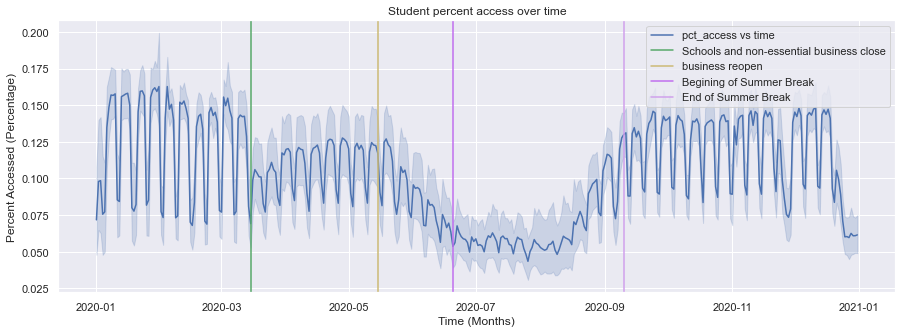

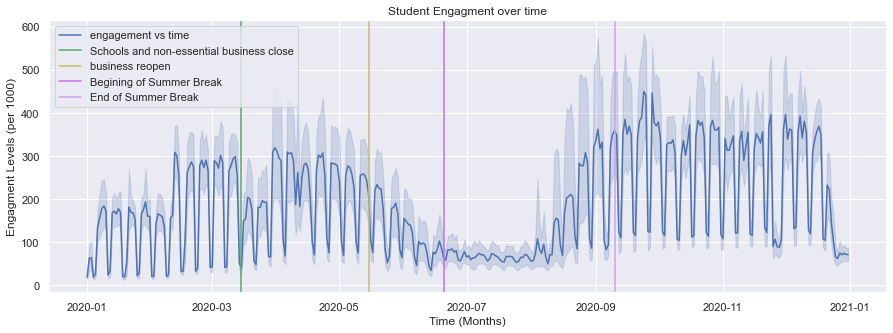

In [33]:
 # CLSCHOOL	CLBSNS	END_BSNS	FM_ALL	
# 2020-03-17	2020-03-24	2020-05-18	2020-05-06
temp = x.groupby(["EngagementDateRecorded","State"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=temp, x="EngagementDateRecorded", y="pct_access",label="pct_access vs time")
ax.set_title("Student percent access over time")
plt.axvline(datetime.datetime(2020, 3, 15),color='g',label="Schools and non-essential business close") # Date when schools and busnisess closed (on avg) 
plt.axvline(datetime.datetime(2020, 5, 15),color='y', label= "Business reopen") # Date when busnisess reopened (on avg) 
plt.axvline(datetime.datetime(2020, 6, 20),color='#C06EEF',label="Beginning of Summer Break") # Date when schools close for due to summer break 
plt.axvline(datetime.datetime(2020, 9, 10),color='#D0A0EC', label= "End of Summer Break") # summer break ends 
plt.xlabel("Time (Months)")
plt.ylabel("Percent Access ")
ax.legend()


fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=temp, x="EngagementDateRecorded", y="engagement_index",label="Engagement vs time")
ax.set_title("Student Engagement over time")
plt.axvline(datetime.datetime(2020, 3, 15),color='g',label="Schools and non-essential business close") # Date when schools and busnisess closed (on avg) 
plt.axvline(datetime.datetime(2020, 5, 15),color='y', label= "business reopen") # Date when busnisess reopened (on avg) 
plt.axvline(datetime.datetime(2020, 6, 20),color='#C06EEF',label="Beginning of Summer Break") # Date when schools close for due to summer break 
plt.axvline(datetime.datetime(2020, 9, 10),color='#D0A0EC', label= "End of Summer Break") # summer break ends 
plt.xlabel("Time (Months)")
plt.ylabel("Engagement Levels (per 1000)")
ax.legend()



- We can clearly see in the first graph of percent access vs Time, that when schools and busniess closed we had an increase of students from pre k- grade 12 accessing more online content
- Then when non-essential busniess reopened it seems that students had a decrease in overall percent access, HOWEVER upon further investigation we have realized that the decrease is most likely a result of schools being closed for summer break  
- The engagement data for the given platforms seems to be very lineary meaning that regardless of policy change on average students engaged with websites the same as before a policy change.
- That being said there may be some policies or other factors that we are not looking that may effect the engagement data. This will require weeks more of research and is outside the scope of this project

- We are currently looking at an average of the engagement data for over 200 different providers throughout 2020
- Lets now look at the most 'popular' providers engagement data differed throughout policy changes. 

In [34]:
# Dataframe for the period between jan 1st - When schools closed - when summer break happened
effectsofPolicyChange = list()

beforePolicyChange = (x.loc[x['EngagementDateRecorded'] < x["CLSCHOOL"]]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index()
afterPolicyChange  = (x.loc[x['CLSCHOOL'] < datetime.date(2020, 6, 20)]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index()

tempdf = pd.merge(beforePolicyChange,afterPolicyChange, on =['State','Provider/Company Name'])

tempdf.rename(columns = {'pct_access_x':'pct_access_before','engagement_index_x':'engagement_index_before',
                                'pct_access_y':'pct_access_after','engagement_index_y':'engagement_index_after'}, inplace = True)
tempdf = tempdf.dropna(axis=0)
tempdf["engagementDifference"] = tempdf["engagement_index_after"] -  tempdf["engagement_index_before"]
tempdf["pct_access_Difference"] = tempdf["pct_access_after"] - tempdf["pct_access_before"]     
tempdf.name = "CLSCHOOL"
effectsofPolicyChange.append(tempdf)


In [35]:
# Dataframe describing the period between when schools reopened in september vs how they were when they first closed in march - june 
beforePolicyChange  = (x.loc[x['CLSCHOOL'] < datetime.date(2020, 6, 20)]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index()
afterPolicyChange  = (x.loc[x['EngagementDateRecorded']  > datetime.date(2020, 9, 10)]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index()

tempdf = pd.merge(beforePolicyChange,afterPolicyChange, on =['State','Provider/Company Name'])

tempdf.rename(columns = {'pct_access_x':'pct_access_before','engagement_index_x':'engagement_index_before',
                                'pct_access_y':'pct_access_after','engagement_index_y':'engagement_index_after'}, inplace = True)
tempdf = tempdf.dropna(axis=0)
tempdf["engagementDifference"] = tempdf["engagement_index_after"] -  tempdf["engagement_index_before"]
tempdf["pct_access_Difference"] = tempdf["pct_access_after"] - tempdf["pct_access_before"]     
tempdf.name = "SchoolsReopened"
effectsofPolicyChange.append(tempdf)



In [36]:
# This one is slightly different because you want the interval between when busniessed closed and reopened 
beforePolicyChange = (x.loc[x['EngagementDateRecorded'] < x["CLBSNS"]]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index() # Key difference here
afterPolicyChange = (x.loc[x['CLBSNS'] < x["END_BSNS"]]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index() # Key difference here
tempdf = pd.merge(beforePolicyChange,afterPolicyChange, on =['State','Provider/Company Name'])
tempdf.rename(columns = {'pct_access_x':'pct_access_before','engagement_index_x':'engagement_index_before',
                                'pct_access_y':'pct_access_after','engagement_index_y':'engagement_index_after'}, inplace = True)
tempdf = tempdf.dropna(axis=0)
tempdf["engagementDifference"] = tempdf["engagement_index_after"] -  tempdf["engagement_index_before"]
tempdf["pct_access_Difference"] = tempdf["pct_access_after"] - tempdf["pct_access_before"]     
tempdf.name = "CLBSNS"
effectsofPolicyChange.append(tempdf)



beforePolicyChange = (x.loc[x['CLBSNS'] < x["END_BSNS"]]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index()
afterPolicyChange = (x.loc[x['END_BSNS'] > x["EngagementDateRecorded"]]).groupby(["State","Provider/Company Name"])[["pct_access","engagement_index"]].mean().reset_index()
tempdf = pd.merge(beforePolicyChange,afterPolicyChange, on =['State','Provider/Company Name'])
tempdf.rename(columns = {'pct_access_x':'pct_access_before','engagement_index_x':'engagement_index_before',
                                'pct_access_y':'pct_access_after','engagement_index_y':'engagement_index_after'}, inplace = True)
tempdf = tempdf.dropna(axis=0)
tempdf["engagementDifference"] = tempdf["engagement_index_after"] -  tempdf["engagement_index_before"]
tempdf["pct_access_Difference"] = tempdf["pct_access_after"] - tempdf["pct_access_before"]     
tempdf.name = "END_BSNS"
effectsofPolicyChange.append(tempdf)

In [37]:
import warnings
warnings.filterwarnings('ignore')

Label name: CLSCHOOL
Median of the average engagement/percent-access  differences for each state:
------------------------------------
engagementDifference    -17.883095
pct_access_Difference    -0.014884
dtype: float64
------------------------------------


,pct_access_before,engagement_index_before,pct_access_after,engagement_index_after,engagementDifference,pct_access_Difference
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.118724,94.856729,0.105715,75.257875,-19.598854,-0.013010
std,0.051045,36.788607,0.055750,33.181266,13.138092,0.010612
min,0.068896,46.742720,0.053274,33.898370,-48.112812,-0.034825
25%,0.089154,61.555629,0.072884,51.142457,-23.964633,-0.019176
50%,0.111322,92.187900,0.101059,74.221878,-17.883095,-0.014884
75%,0.124664,113.925346,0.110007,95.362758,-12.981265,-0.006850
max,0.323661,168.373002,0.323661,168.373002,0.000000,0.007863


[Text(0, 0.5, 'Engagement Level')]

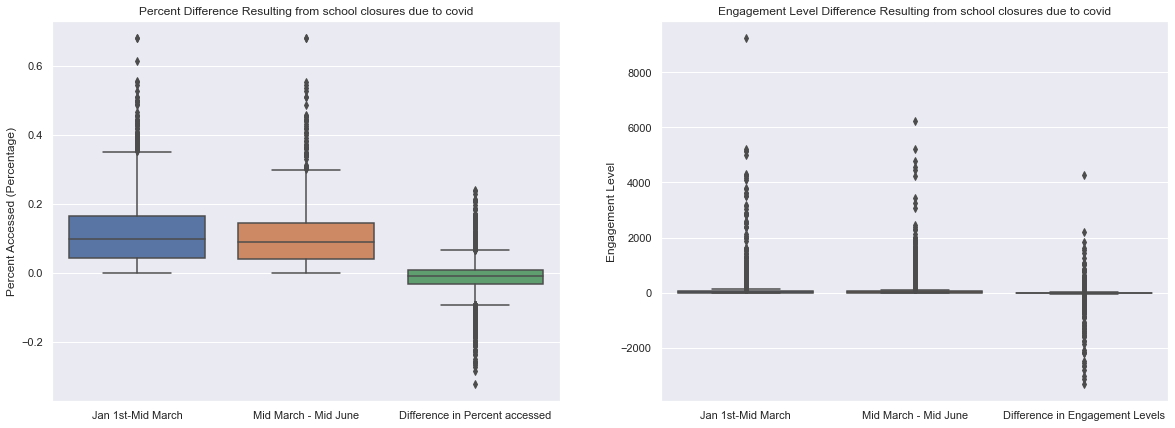

In [38]:
df = effectsofPolicyChange[0]
print("Label name: " + df.name)
print("Median of the average engagement/percent-access  differences for each state:")
print("------------------------------------")
print(df.groupby("State")[["engagementDifference","pct_access_Difference"]].mean().median())
print("------------------------------------")
display(df.groupby("State").mean().reset_index().describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.boxplot(data=df[["pct_access_before","pct_access_after","pct_access_Difference"]],ax=ax[0])
ax[0].set_title('Percent Difference Resulting from school closures due to covid' )
ax[0].set_xticklabels(["Jan 1st-Mid March","Mid March - Mid June","Difference in Percent accessed"])
ax[0].set(ylabel="Percent Accessed (Percentage)")


sns.boxplot(data=df[["engagement_index_before","engagement_index_after","engagementDifference"]],ax=ax[1])
ax[1].set_title('Engagement Level Difference Resulting from school closures due to covid' )
ax[1].set_xticklabels(["Jan 1st-Mid March","Mid March - Mid June","Difference in Engagement Levels"])
ax[1].set(ylabel="Engagement Level")

Label name: SchoolsReopened
Median of the average engagement/percent-access  differences for each state:
------------------------------------
engagementDifference     7.859469
pct_access_Difference    0.008037
dtype: float64
------------------------------------


,pct_access_before,engagement_index_before,pct_access_after,engagement_index_after,engagementDifference,pct_access_Difference
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.095297,69.978884,0.102733,77.399731,7.420847,0.007436
std,0.030766,27.519948,0.027485,26.426336,15.010761,0.009394
min,0.054710,32.299203,0.070380,35.470759,-28.810613,-0.021037
25%,0.070517,48.461306,0.078264,54.448099,3.171556,0.004859
50%,0.095543,73.512748,0.100403,85.156432,7.859469,0.008037
75%,0.108700,83.762240,0.116792,95.531469,14.607864,0.012338
max,0.163446,118.872473,0.160239,123.527076,42.189617,0.022581


Text(0.5, 1.0, 'Engagement levels from adapting to an online format')

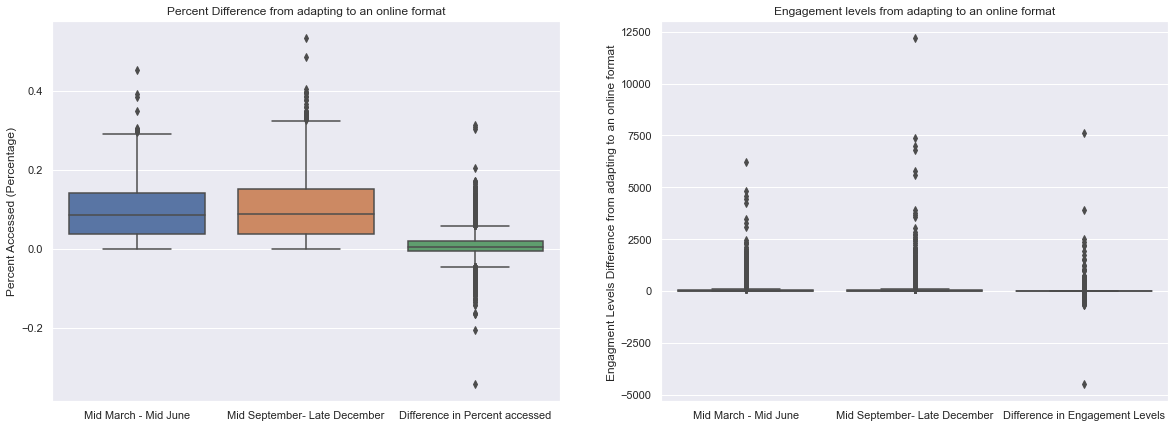

In [39]:
df = effectsofPolicyChange[1]
print("Label name: " + df.name)
print("Median of the average engagement/percent-access  differences for each state:")
print("------------------------------------")
print(df.groupby("State")[["engagementDifference","pct_access_Difference"]].mean().median())
print("------------------------------------")
display(df.groupby("State").mean().reset_index().describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.boxplot(data=df[["pct_access_before","pct_access_after","pct_access_Difference"]],ax=ax[0])
ax[0].set_xticklabels(["Mid March - Mid June","Mid September- Late December","Difference in Percent accessed"])
ax[0].set(ylabel="Percent Accessed (Percentage)")
ax[0].set_title('Percent Difference from adapting to an online format' )

sns.boxplot(data=df[["engagement_index_before","engagement_index_after","engagementDifference"]],ax=ax[1])
ax[1].set_xticklabels(["Mid March - Mid June","Mid September- Late December","Difference in Engagement Levels"])
ax[1].set(ylabel="Engagment Levels Difference from adapting to an online format ")
ax[1].set_title('Engagement levels from adapting to an online format' )

Label name: CLBSNS
Median of the average engagement/percent-access  differences for each state:
------------------------------------
engagementDifference    -15.522661
pct_access_Difference    -0.012514
dtype: float64
------------------------------------


,pct_access_before,engagement_index_before,pct_access_after,engagement_index_after,engagementDifference,pct_access_Difference
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.115913,91.925452,0.105182,74.646174,-17.279278,-0.010731
std,0.052486,37.405484,0.055724,33.108727,12.725480,0.009420
min,0.063279,43.477392,0.052768,33.898370,-42.428485,-0.028659
25%,0.086670,59.157464,0.072884,51.044609,-26.068763,-0.015232
50%,0.110525,86.268658,0.099165,73.883981,-15.522661,-0.012514
75%,0.122967,110.213136,0.110007,94.923588,-7.677143,-0.005669
max,0.323661,168.373002,0.323661,168.373002,1.740203,0.006634


Text(0.5, 1.0, 'Percent Difference Before and after Non-Essential Business Closed')

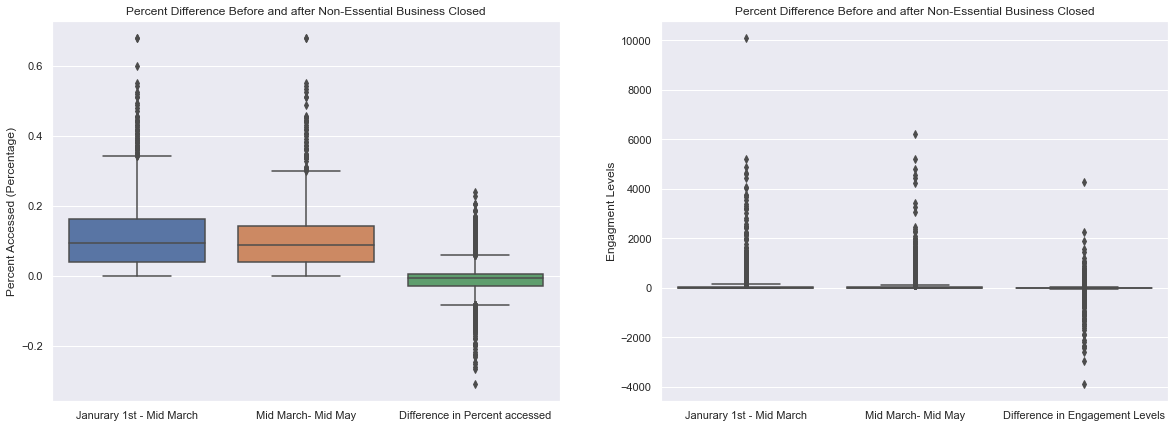

In [42]:
df = effectsofPolicyChange[2]
print("Label name: " + df.name)
print("Median of the average engagement/percent-access  differences for each state:")
print("------------------------------------")
print(df.groupby("State")[["engagementDifference","pct_access_Difference"]].mean().median())
print("------------------------------------")
display(df.groupby("State").mean().reset_index().describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.boxplot(data=df[["pct_access_before","pct_access_after","pct_access_Difference"]],ax=ax[0])
ax[0].set_title('Percent Difference before the first school lock down')
ax[0].set_xticklabels(["Janurary 1st - Mid March","Mid March- Mid May","Difference in Percent accessed"])
ax[0].set(ylabel="Percent Accessed (Percentage)")
ax[0].set_title('Percent Difference Before and after Non-Essential Business Closed')



sns.boxplot(data=df[["engagement_index_before","engagement_index_after","engagementDifference"]],ax=ax[1])
ax[1].set_title('Engagement Difference before the first school lock down')
ax[1].set_xticklabels(["Janurary 1st - Mid March","Mid March- Mid May","Difference in Engagement Levels"])
ax[1].set(ylabel="Engagment Levels")
ax[1].set_title('Percent Difference Before and after Non-Essential Business Closed')

Label name: END_BSNS
Median of the average engagement/percent-access  differences for each state:
------------------------------------
engagementDifference     6.014040
pct_access_Difference    0.008635
dtype: float64
------------------------------------


,pct_access_before,engagement_index_before,pct_access_after,engagement_index_after,engagementDifference,pct_access_Difference
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.103773,71.992054,0.110748,78.810143,6.818089,0.006975
std,0.055663,32.327531,0.055180,34.898651,11.031129,0.008526
min,0.052659,33.898370,0.054403,33.956019,-12.798750,-0.014399
25%,0.071068,49.251332,0.080566,52.248014,0.021029,0.000885
50%,0.096622,71.077893,0.106206,68.050646,6.014040,0.008635
75%,0.108594,90.518707,0.119733,99.430186,13.377946,0.011870
max,0.323661,168.373002,0.323661,168.373002,31.280405,0.025510


Text(0.5, 1.0, 'Engagement Difference Before and after Non-Essential Business Re-Opened')

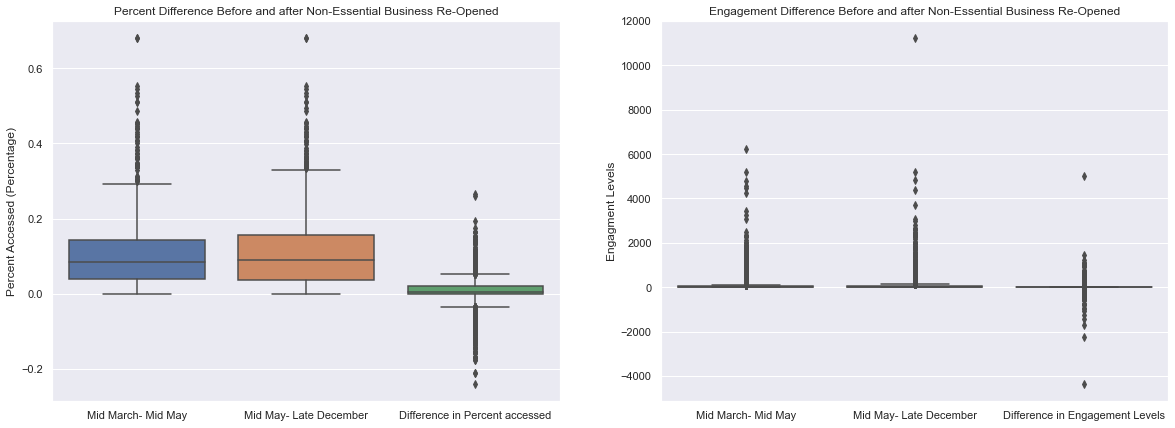

In [43]:
df = effectsofPolicyChange[3]
print("Label name: " + df.name)
print("Median of the average engagement/percent-access  differences for each state:")
print("------------------------------------")
print(df.groupby("State")[["engagementDifference","pct_access_Difference"]].mean().median())
print("------------------------------------")
display(df.groupby("State").mean().reset_index().describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.boxplot(data=df[["pct_access_before","pct_access_after","pct_access_Difference"]],ax=ax[0])
ax[0].set_xticklabels(["Mid March- Mid May","Mid May- Late December","Difference in Percent accessed"])
ax[0].set(ylabel="Percent Accessed (Percentage)")
ax[0].set_title('Percent Difference Before and after Non-Essential Business Re-Opened')


sns.boxplot(data=df[["engagement_index_before","engagement_index_after","engagementDifference"]],ax=ax[1])
ax[1].set_xticklabels(["Mid March- Mid May","Mid May- Late December","Difference in Engagement Levels"])
ax[1].set(ylabel="Engagment Levels")
ax[1].set_title('Engagement Difference Before and after Non-Essential Business Re-Opened')


### ---------------------------------------BREAK---------------------------------------

In [70]:
meanEngagmentBefore = df["engagement_index_before"].mean()
meanEngagmentAfter = df["engagement_index_after"].mean()

pctAcessBefore = df["pct_access_before"].mean()
pctAcessAfter = df["pct_access_after"].mean()

It seems that on average most websites decreased the amount of visits and engagement after schools were closed and busniess closed.
However when busniess reopened and more students enageged and visited a larger variety of websites.

This seems to be going away from our original ituttion. Students should tend to be more online when not in school . 
Instead of looking at all learning platforms lets take a look at the ones with the most student engagement. Ie the most 'popular' 

Lets find the top 10 most popular platforms 'before' the pandemic ie, before schools and busniesses closed in mid march 

In [138]:
before_the_first_majorPolicy = effectsofPolicyChange[0]
print(before_the_first_majorPolicy.name)
display(before_the_first_majorPolicy)

CLSCHOOL


,State,Provider/Company Name,pct_access_before,engagement_index_before,pct_access_after,engagement_index_after,engagementDifference,pct_access_Difference
0,arizona,"Autodesk, Inc",0.251800,15.430000,0.167867,15.430000,0.000000,-0.083933
1,arizona,Tes Global Ltd,0.120000,2.470000,0.120000,2.470000,0.000000,0.000000
3,arizona,"ABCya.com, LLC",0.179333,25.086667,0.172683,26.857179,1.770513,-0.006650
4,arizona,Actively Learn,0.120000,4.930000,0.276481,85.902703,80.972703,0.156481
5,arizona,Adobe Inc.,0.102170,33.003750,0.115394,18.690667,-14.313083,0.013224
...,...,...,...,...,...,...,...,...
4477,wisconsin,iCivics Inc,0.240108,97.122432,0.171396,53.351333,-43.771099,-0.068712
4478,wisconsin,iHeartRadio,0.246923,88.182727,0.096492,40.981406,-47.201321,-0.150431
4479,wisconsin,iStockphoto LP,0.052941,1.260625,0.035208,1.311944,0.051319,-0.017733
4480,wisconsin,mrdonn.org,0.166316,7.995294,0.100500,6.142903,-1.852391,-0.065816


In [139]:
top10pctAccess= list(before_the_first_majorPolicy.groupby(["Provider/Company Name"])["pct_access_before"].mean().reset_index().sort_values(by="pct_access_before", ascending = False).head(10)["Provider/Company Name"])
top10engagment= list(before_the_first_majorPolicy.groupby(["Provider/Company Name"])["engagement_index_before"].mean().reset_index().sort_values(by="engagement_index_before",ascending = False).head(10)["Provider/Company Name"])
# topPlatforms = list(set(top10pctAccess+top10engagment))

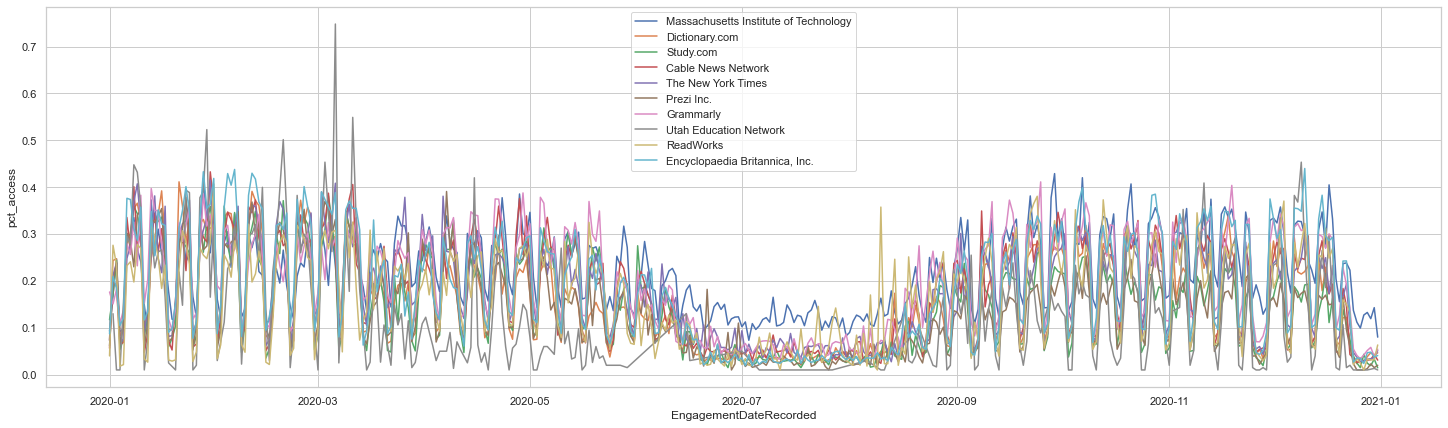

In [140]:
temp = x[x['Provider/Company Name'].isin(top10pctAccess)][["EngagementDateRecorded","pct_access","Provider/Company Name"]]

# After looking at the data i have realzied that many of the dates have a pct_access that is equal to zero , i believe that the data is missing. Therefor i will remove the 'zero' rows
temp = temp.loc[temp['pct_access'] != 0] 
temp['EngagementDateRecorded'] = pd.to_datetime(temp['EngagementDateRecorded'])

temp['month'] = temp['EngagementDateRecorded'].dt.month

fig, ax = plt.subplots(figsize=(25, 7))
sns.lineplot(data =temp, y= 'pct_access', x = 'EngagementDateRecorded', hue = 'Provider/Company Name', errorbar = None)
# plt.axvline(x=3,color='#515C54',lw = '4',label="Schools and non-essential busniess close") # Date when schools and busnisess closed (on avg) 
# plt.axvline(x=5,color='#648679',lw = '4', label= "Busniesses reopen") # Date when busnisess reopened (on avg) 

ax.legend()
# # ax.set_title(str(airPollutant)+" Emissions vs Year ")

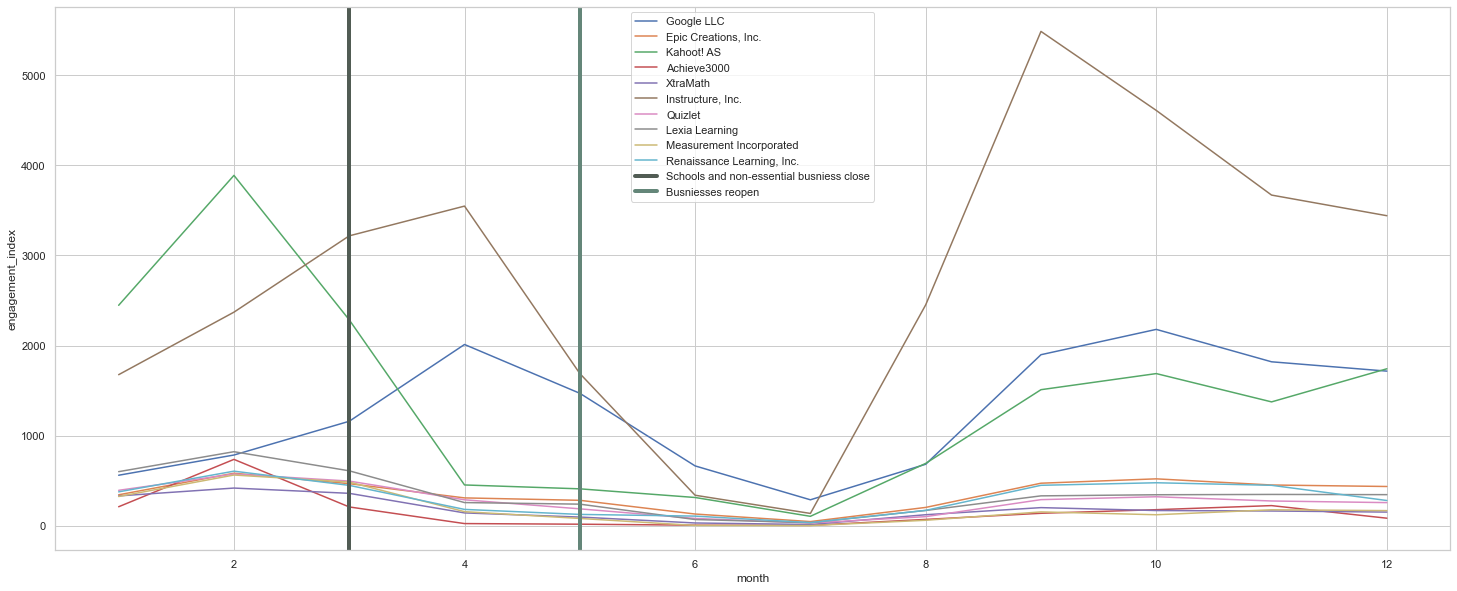

In [141]:
temp = x[x['Provider/Company Name'].isin(top10engagment)][["EngagementDateRecorded","engagement_index","Provider/Company Name"]]
# After looking at the data i have realzied that many of the dates have a engagement_index that is equal to ze or nan ro , i believe that the data is missing. Therefor i will remove the 'zero' rows
temp = temp.loc[temp['engagement_index'] != 0] 
temp['EngagementDateRecorded'] = pd.to_datetime(temp['EngagementDateRecorded'])

temp['month'] = temp['EngagementDateRecorded'].dt.month

fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(data =temp, y= 'engagement_index', x = 'month', hue = 'Provider/Company Name', errorbar = None)
plt.axvline(x=3,color='#515C54',lw = '4',label="Schools and non-essential busniess close") # Date when schools and busnisess closed (on avg) 
plt.axvline(x=5,color='#648679',lw = '4', label= "Busniesses reopen") # Date when busnisess reopened (on avg) 

ax.legend()
# # ax.set_title(str(airPollutant)+" Emissions vs Year ")

In [142]:
df_list = []

topProviderandCompanies = pd.DataFrame()
for df in effectsofPolicyChange:
    # print("Label name: " + df.name)
    # print("Median of the average engagement/percent-access  differences for each state:")
    # print("------------------------------------")
    temp = df.groupby("Provider/Company Name")[["engagementDifference","pct_access_Difference"]].mean()

    df_list.append(temp.nlargest(10, 'engagementDifference'))
    df_list.append(temp.nlargest(10, 'pct_access_Difference'))

    # print(df.groupby("Provider/Company Name")[["engagementDifference","pct_access_Difference"]].mean())
    # print("------------------------------------")
    # display(df.groupby("Provider/Company Name").mean().reset_index().describe())


temp1234 = pd.concat(df_list, ignore_index=False)


In [62]:
# temp.nlargest(10, 'pct_access_Difference')


In [143]:
temp1234.sort_values(by="engagementDifference",ascending=False).head(20)

,engagementDifference,pct_access_Difference
Provider/Company Name,,
"Instructure, Inc.",826.398139,0.023767
Google LLC,572.333838,-0.018342
Seesaw Learning Inc,563.315253,0.105922
Seesaw Learning Inc,563.315253,0.105922
Kahoot! AS,560.740589,0.013142
Google LLC,554.558554,0.011935
Google LLC,545.393176,-0.015370
Seesaw Learning Inc,452.524913,0.075242
Seesaw Learning Inc,452.524913,0.075242


In [37]:
workingDf.groupby("Provider/Company Name").mean()

Since there is alot of different websites we will only take a 

## ------------------------- BREAK ------------------------------